# Deep Dive into Food Insecure States

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
access_stan = pd.read_pickle("Datasets/access_stan")
assistance_stan = pd.read_pickle("Datasets/assistance_stan")
health_stan = pd.read_pickle("Datasets/health_stan")
local_stan = pd.read_pickle("Datasets/local_stan")
population_stan = pd.read_pickle("Datasets/population_stan")
restaurants_stan = pd.read_pickle("Datasets/restaurants_stan")
socioecnomic_stan = pd.read_pickle("Datasets/socioecnomic_stan")
stores_stan = pd.read_pickle("Datasets/stores_stan")
insecurity_state_stan = pd.read_pickle("Datasets/insecurity_state_stan")

In [3]:
states = ["MO",
         "AZ",
         "LA",
         "AL",
         "KY"]

## Create US Averages

Using the median, because as discussed in the EDA notebook, much of this data is skewed. Because of this, I believe that the median will be a more accurate description of the "average."

In [63]:
access_us = pd.DataFrame(access_stan.median()).transpose()
assistancs_us = pd.DataFrame(assistance_stan.median()).transpose()
health_us = pd.DataFrame(health_stan.median()).transpose()
local_us = pd.DataFrame(local_stan.median()).transpose()
population_us = pd.DataFrame(population_stan.median()).transpose()
restaurants_us = pd.DataFrame(restaurants_stan.median()).transpose()
socioecnomic_us = pd.DataFrame(socioecnomic_stan.median()).transpose()
stores_us = pd.DataFrame(stores_stan.median()).transpose()
insecurity_us = pd.DataFrame(insecurity_state_stan.median()).transpose()

## Check top 5 most insecure states with standardized values

In [27]:
insecurity_state_stan.describe()

,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,-2.307522e-16,2.329291e-16,1.429684e-15,1.000017e-17,-8.348442e-16,3.366044e-16,3.265362e-18,3.559244e-16,1.031854e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.765493e+00,-2.255848e+00,-1.925908e+00,-2.333863e+00,-2.285564e+00,-2.085543e+00,-2.761108e+00,-1.965438e+00,-2.311798e+00
25%,-7.864354e-01,-5.688029e-01,-7.243657e-01,-8.062436e-01,-7.036977e-01,-7.455406e-01,-4.772959e-01,-7.479804e-01,-6.326284e-01
50%,5.644867e-03,-3.388613e-02,-1.331307e-01,8.486775e-02,-1.163137e-02,-7.553936e-02,-8.737683e-02,-1.102646e-01,-9.289524e-02
75%,7.907216e-01,5.421781e-01,5.725369e-01,5.622489e-01,6.804350e-01,6.782121e-01,4.696504e-01,5.854254e-01,6.567341e-01
max,1.704461e+00,2.764140e+00,2.765828e+00,2.121694e+00,2.558901e+00,2.101965e+00,3.366192e+00,2.556547e+00,2.305919e+00


In [34]:
insecurity_state.loc[insecurity_state["FOODINSEC_13_15"]>15].sort_values(by="FOODINSEC_13_15", ascending=False).head(5)

,State,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
24,MO,29117.71,20.9,20.8,-0.1,6.9,7.9,1.0,8.3,9.0
3,AZ,4013.87,19.7,19.2,-0.5,8.1,7.4,-0.7,9.7,10.9
18,LA,22064.00,15.7,18.4,2.7,4.8,7.7,2.9,9.1,9.0
1,AL,1067.00,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
17,KY,21120.00,15.6,17.6,2.0,6.2,7.3,1.1,8.0,10.0


In [33]:
insecurity_state_stan.loc[insecurity_state_stan["FOODINSEC_13_15"]>1.2].sort_values(by="FOODINSEC_13_15", ascending=False)

,State,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
24,MO,0.005645,2.764140,2.765828,0.339471,1.372501,2.101965,1.249489,0.063658,0.027045
3,AZ,-1.579426,2.270371,2.155521,0.084868,2.558901,1.683214,-0.644404,0.875296,1.166482
18,LA,-0.439730,0.624473,1.850367,2.121694,-0.703698,1.934464,3.366192,0.527451,0.027045
1,AL,-1.765493,1.529717,1.545214,0.212169,1.273635,1.599464,0.692461,0.179606,0.206956
17,KY,-0.499335,0.583326,1.545214,1.676138,0.680435,1.599464,1.360894,-0.110265,0.626749


The states are the same, but looking at the standardized data it is easier to see how much Missouri is an outlier, and how much difference there is between the averages in the same state. 

## Plotting and Exploring

### Fast food and grocery stores

In [39]:
rest_store_merge = (restaurants_stan[restaurants_stan["State"]
                                     .isin(states)].merge(stores_stan, on="FIPS")
                    .drop(columns=["State_y", "County_y"])
                    .rename(columns={"State_x":"State",
                                     "County_x":"County"}))

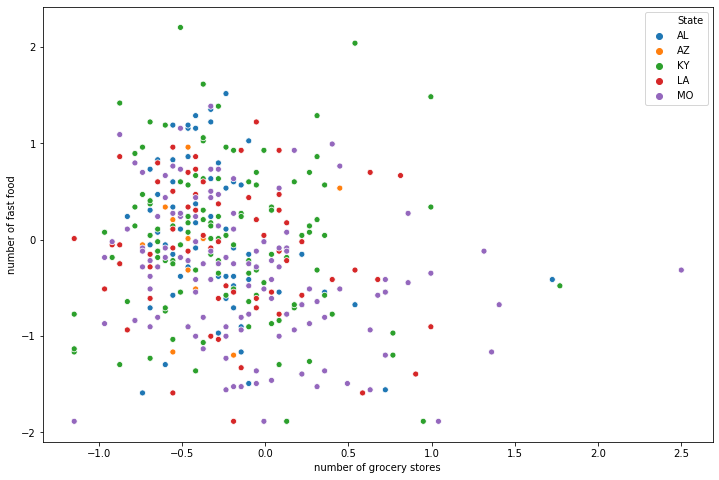

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=rest_store_merge,
                    x="GROCPTH14",
                    y="FFRPTH14", 
                    hue="State");
# ax = sns.lineplot(data=rest_store_merge,
#                  x="GROCPTH14",
#                  y="FFRPTH14");
ax.set(xlabel='number of grocery stores', ylabel='number of fast food');

There does seem to be a small, negative correlation between the number of grocery stores and the number of fast food restaurants. 

### Grocery stores and convience stores

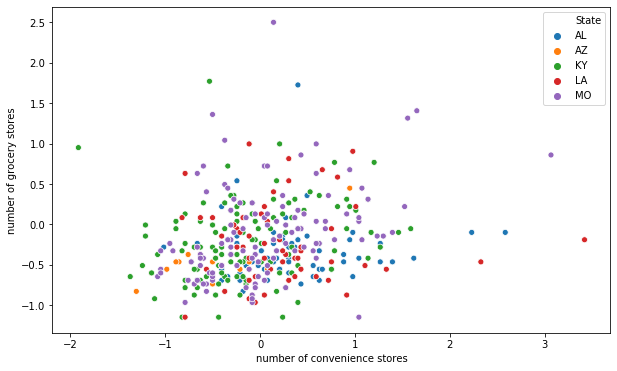

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=rest_store_merge,
                    x="CONVSPTH14",
                    y="GROCPTH14", 
                    hue="State");
# ax = sns.lineplot(data=rest_store_merge,
#                  x="CONVSPTH14",
#                  y="GROCPTH14");
ax.set(xlabel='number of convenience stores', ylabel='number of grocery stores');

This graph actually shows the opposite of what I anticipated - with an increase in convenience stores, there is a slight positive correlation with grocery stores. 

### Grocery stores and convenience stores vs fast food

In [77]:
rest_store_merge["groc_convs"] = rest_store_merge["GROCPTH14"]+rest_store_merge["CONVSPTH14"]

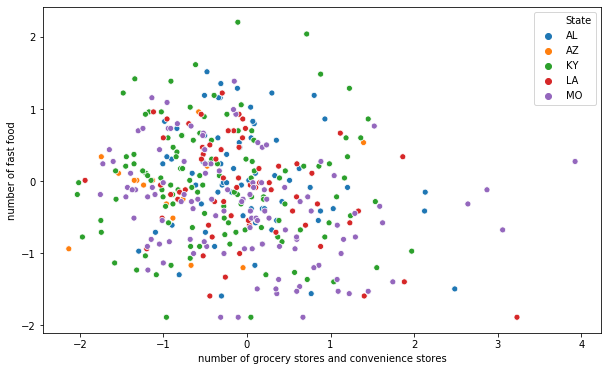

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=rest_store_merge,
                    x="groc_convs",
                    y="FFRPTH14", 
                    hue="State");
ax.set(xlabel='number of grocery stores and convenience stores', ylabel='number of fast food');

There does not seem to be a clear trend comparing grocery stores and convenience stores to the number of fast food restaurants. 